In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# Set device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define batch size and number of epochs
BATCH_SIZE = 64
EPOCHS = 10

# Download and extract the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [3]:
# Define the text preprocessing pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

# Preprocess the training and testing data
X_train = pipeline.fit_transform(newsgroups_train.data).todense()
y_train = newsgroups_train.target
X_test = pipeline.transform(newsgroups_test.data).todense()
y_test = newsgroups_test.target

In [4]:
# Convert the data into PyTorch tensors and create the data loaders
train_data = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train))
test_data = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test))

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)


In [5]:
# Define the neural network model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [6]:
# Initialize the model, loss function, and optimizer
model = TextClassifier(X_train.shape[1], 128, len(newsgroups_train.target_names)).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [7]:
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

In [8]:
# Train the model
for epoch in range(EPOCHS):
    total = 0
    correct = 0
    running_loss = 0.0
    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    epoch_loss = running_loss / len(train_data)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)
    print(f"Epoch {epoch+1}/{EPOCHS} loss: {epoch_loss:.4f}")
    
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for X, y in tqdm(test_loader, desc="Testing"):
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
        
    epoch_loss = running_loss / len(test_data)
    epoch_acc = correct / total
    test_loss_history.append(epoch_loss)
    test_acc_history.append(epoch_acc)
    print(f"Test accuracy: {correct / total}")

Epoch 1/10: 100%|██████████| 177/177 [00:59<00:00,  2.97it/s]


Epoch 1/10 loss: 2.7173


Testing: 100%|██████████| 118/118 [00:05<00:00, 20.55it/s]


Test accuracy: 0.7239776951672863


Epoch 2/10: 100%|██████████| 177/177 [00:53<00:00,  3.31it/s]


Epoch 2/10 loss: 1.2473


Testing: 100%|██████████| 118/118 [00:05<00:00, 21.89it/s]


Test accuracy: 0.8450610727562401


Epoch 3/10: 100%|██████████| 177/177 [00:50<00:00,  3.54it/s]


Epoch 3/10 loss: 0.2978


Testing: 100%|██████████| 118/118 [00:05<00:00, 21.15it/s]


Test accuracy: 0.858072225172597


Epoch 4/10: 100%|██████████| 177/177 [00:49<00:00,  3.58it/s]


Epoch 4/10 loss: 0.0968


Testing: 100%|██████████| 118/118 [00:05<00:00, 22.01it/s]


Test accuracy: 0.8601964949548593


Epoch 5/10: 100%|██████████| 177/177 [00:49<00:00,  3.55it/s]


Epoch 5/10 loss: 0.0422


Testing: 100%|██████████| 118/118 [00:05<00:00, 20.10it/s]


Test accuracy: 0.8632501327668614


Epoch 6/10: 100%|██████████| 177/177 [00:56<00:00,  3.14it/s]


Epoch 6/10 loss: 0.0234


Testing: 100%|██████████| 118/118 [00:05<00:00, 20.07it/s]


Test accuracy: 0.8633828996282528


Epoch 7/10: 100%|██████████| 177/177 [00:54<00:00,  3.23it/s]


Epoch 7/10 loss: 0.0153


Testing: 100%|██████████| 118/118 [00:05<00:00, 20.35it/s]


Test accuracy: 0.862453531598513


Epoch 8/10: 100%|██████████| 177/177 [00:54<00:00,  3.26it/s]


Epoch 8/10 loss: 0.0113


Testing: 100%|██████████| 118/118 [00:05<00:00, 21.68it/s]


Test accuracy: 0.8623207647371216


Epoch 9/10: 100%|██████████| 177/177 [00:54<00:00,  3.25it/s]


Epoch 9/10 loss: 0.0085


Testing: 100%|██████████| 118/118 [00:05<00:00, 21.81it/s]


Test accuracy: 0.8632501327668614


Epoch 10/10: 100%|██████████| 177/177 [00:54<00:00,  3.24it/s]


Epoch 10/10 loss: 0.0072


Testing: 100%|██████████| 118/118 [00:05<00:00, 21.83it/s]

Test accuracy: 0.8623207647371216


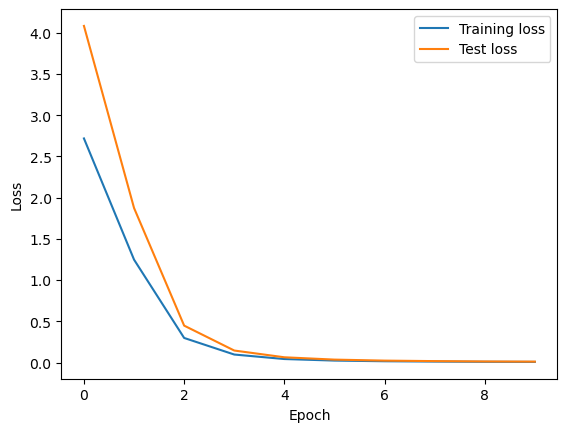

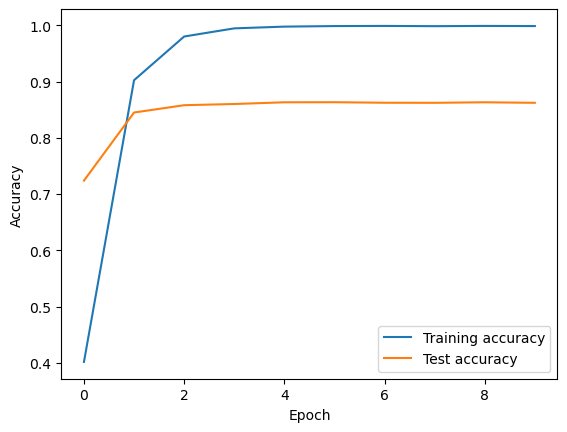

In [10]:
# Plot the loss and accuracy for each epoch
plt.plot(train_loss_history, label="Training loss")
plt.plot(test_loss_history, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(train_acc_history, label="Training accuracy")
plt.plot(test_acc_history, label="Test accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()